# 빅데이터 01-파이썬 리뷰

## *과제 1 : 성별, 혈액형 별 몸무게의 평균

결과예시)

남자, A, 얼마

남자, B, 얼마

### 제출방법 

test1.ipynb 파일 제출 (위 내용 포함)  

In [1]:
fd = open("./files/studentlist.txt")
fd.readline()
lines = fd.readlines()

In [3]:
Table = []
for line in lines:
    fields=line.split(",")
    fields[2] = int(fields[2])
    fields[6] = float(fields[6])
    fields[7] = float(fields[7])
    Table.append(fields)
print(Table[1:3])

[['이미린', '여자', 22, '2', '무', 'AB', 170.1, 53.0, '03\n'], ['홍길동', '남자', 24, '4', '무', 'B', 175.0, 80.1, '01\n']]


In [14]:
answer = {} #{성별: {혈액형:수, 혈액형:수, 혈액형: 수, 혈액형: 수}}
for items in Table:
    sex = items[1]
    blood = items[5]
    weight = items[7]
    if sex in answer: #그 성별이 이미 있다면
        if blood in answer[sex]: #성별도 있고, 혈액형도 있다면
            answer[sex][blood]+=1
        else: #성별있는데 혈액형 없으면
            answer[sex][blood] = 1
    else:
        answer[sex] = {blood : 1}
        
for key in answer:
    for values in answer[key]:
        print(key, values,'형', answer[key][values])

남자 O 형 2
남자 B 형 4
남자 AB 형 2
남자 A 형 2
여자 AB 형 1
여자 A 형 2
여자 O 형 3
여자 B 형 1


# 빅데이터 02-Numpy

## 과제 1 : 1부터 30까지 숫자로 (5,3,2) 3차원을 만든 뒤, 각 숫자에 0과1 사이의 random noise  을 곱한 결과를 출력하시오
- np.random.rand() : 0~1 사이 숫자 생성

In [23]:
import numpy as np
myarr = np.arange(1,31,1).reshape(5,3,2) #(1,31,1) 말고 (30) 쓰면 0~29까지 생김
rnarr = np.random.rand(30).reshape(5,3,2) #rand()의 인자는 범위가 아니라 만들 숫자의 갯수이다.
myarr = myarr * rnarr #myarr *= rnarr 하면 안됨.
print(myarr)

[[[0.4885635  0.26927622]
  [0.47624048 0.06568294]
  [0.02388186 0.92715892]]

 [[0.71749392 0.27655281]
  [0.03631016 0.92429619]
  [0.92792951 0.22721555]]

 [[0.08845738 0.11422942]
  [0.97971659 0.47284854]
  [0.13377925 0.66601596]]

 [[0.53063541 0.09567378]
  [0.18947456 0.6900781 ]
  [0.40208724 0.66982855]]

 [[0.03532063 0.48773619]
  [0.76751539 0.23340464]
  [0.71240238 0.40119975]]]
[[[ 0.4885635   0.53855245]
  [ 1.42872145  0.26273175]
  [ 0.11940931  5.56295352]]

 [[ 5.02245741  2.21242245]
  [ 0.3267914   9.24296187]
  [10.20722458  2.72658658]]

 [[ 1.149946    1.59921195]
  [14.69574887  7.56557669]
  [ 2.27424725 11.98828721]]

 [[10.08207278  1.9134757 ]
  [ 3.97896582 15.18171829]
  [ 9.24800661 16.07588521]]

 [[ 0.88301587 12.6811409 ]
  [20.72291563  6.53532991]
  [20.65966912 12.03599247]]]


## 과제 2 : np.arange(30).reshape((5,6)) 에서 0,2,4.. column (axis=1) 만 뽑아서 새로운 array를 만드시오

In [9]:
import numpy as np
array2 = np.arange(30).reshape((5,6))
new_array2 = array2[:, 0:5:2]
print(new_array2)

[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]
 [18 20 22]
 [24 26 28]]


## 과제 3 : 혈액형이 B형인 사람의 키의 평균을 구하시오

In [16]:
fd = open("./files/studentlist.txt")
fd.readline()
lines = fd.readlines()

Table3 = []

for line in lines:
    fields = line.split(',')
    fields[6] = float(fields[6])
    Table3.append(fields)
    
for line in Table3:    
    blood = line[5]
    height = line[6]
    
    if blood=='B':
        B_total+=1
        avg += height
        
print(avg/B_total)
    

171.28


## 과제 4 : 각 사람의 BMI ( 몸무게 kg /  (키 m ^2) )를 구하여 column을 추가하시오


In [19]:
import pandas as pd
df = pd.read_csv("./files/studentlist.csv", encoding='cp949') #csv로 dataframe 만들기 
df['BMI'] = (df['weight']/(df['height']*0.01 * df['height']*0.01)) #컬럼끼리 묶어서 계산해도 됨
df

,name,sex,age,grade,absence,bloodtype,height,weight,dept,BMI
0,김길동,남자,23,3,유,O,165.3,68.2,2,24.959660
1,이미린,여자,22,2,무,AB,170.1,53.0,3,18.317544
2,홍길동,남자,24,4,무,B,175.0,80.1,1,26.155102
3,김철수,남자,23,3,무,AB,182.1,85.7,2,25.844071
4,손세수,여자,20,1,유,A,168.0,49.5,1,17.538265
5,박미희,여자,21,2,무,O,162.0,52.0,3,19.814053
6,강수친,여자,22,1,무,O,155.2,45.3,2,18.806794
7,이희수,여자,23,1,무,A,176.9,55.0,1,17.575473
8,이철린,남자,23,3,무,B,178.5,64.2,1,20.149236
9,방희철,남자,22,2,무,B,176.1,61.3,3,19.767046


## 과제 5 : studentlist의 혈액형 별 도수를 bar 차트로 그리시오

<BarContainer object of 4 artists>

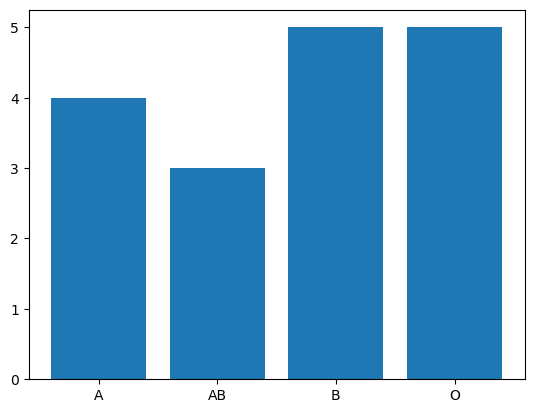

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./files/studentlist.csv", encoding='cp949')

blood_df = df.groupby(["bloodtype"]).size()
index = blood_df.index
plt.bar(index, blood_df[index])

# 빅데이터 03-크롤링과 스크레이핑

### 과제1 : 블로그 검색, "빅데이터", 정확도 순, 1~110번 제목만 출력 


In [39]:
import os
import sys
import datetime
import time
import json

client_id = ''
client_secret = ''

LEC=True

import urllib.request

def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            #print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None
    
def getNaverSearch(svc, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    svc = "/%s.json" % svc
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    #parameters = "?query=%s&start=%s&display=%s&sort=date" % (urllib.parse.quote(srcText), start, display) 로 하면 날짜순 내림차순 정렬
    
    url = base + svc + parameters
    responseDecode = getRequestUrl(url)
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)
    
def getPostData(resultJ, resultL):
    for item in resultJ['items'] :

        #변환
        pDate = datetime.datetime.strptime(item['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
        pDate = pDate.strftime('%Y-%m-%d')

        #필드 추출 
        resultL.append( [ item['title'],   item['description'], item['originallink'], pDate])
    #print (len(resultL))

def main():
    svc = 'news'   # 크롤링 할 대상  : news, blog, encyc, shop
    srcText = input('검색어를 입력하세요: ')
    resultL=[]
    start=1
          
    jsonResponse = getNaverSearch(svc, srcText, start, 100)        
    if jsonResponse != None:
        getPostData(jsonResponse, resultL)
    start+=100
    
    jsonResponse = getNaverSearch(svc, srcText, start, 10)
    if jsonResponse != None:
        getPostData(jsonResponse, resultL)
    
    for post in resultL:
        post[0] = post[0].replace('<b>','')
        post[0] = post[0].replace('</b>', '')
        print(post[0])

    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 빅데이터
[부산시] 어르신 위한 맞춤형 종합 운동시설 복합힐링파크 건립 外
서울시, 13만 고립은둔 청년 찾아내 사회복귀 지원
[인천지역 급성·만성질환 들여다보기·(2)] 뇌졸중
스웨덴 나카교육청 교류단, 경남교육 현장 찾는다
&apos;아이톡톡&apos; 활용 미래형 수업, 교사역량 강화 연수
이대서울병원, 전립선비대증 당일 수술 시스템 구축 外
오세훈 시장, 고립･은둔청년 사회참여 유도 지원 체계 시행
&quot;AI, 기술에 그치지 않고 사업화…수익으로 신사업 기반 만들죠&quot;
한국기술벤처재단, 2023 혁신창업스쿨 딥테크스쿨 트랙 교육생 모집
[2023 금융투자대상]금투업계 트렌드 반영해 3개 부문 신설
&quot;다시 나올 수 있도록&quot;…&apos;은둔 청년&apos; 서울시가 지원 나선다
[호남대 AI 큐브] 백란 호남대 AI융합대학 학장, &quot;AI 시대, 디지털 리터러시 ...
[2023 금융투자대상]밸류파인더, 독립리서치 산업 선도
[DX빅뱅] 금융사고 막고 주가 분석하고 은행·증권·보험에 초거대 AI
[DX빅뱅] 기획·생산·경영관리 한번에… `SaaS 통합플랫폼` 통했다
전철 얌체 승객 &apos;발 못 붙인다&apos;
[브랜드평판] 건강관리기술 상장기업 2023년 4월 빅데이터 분석결과...1위 제...
[THE INFLUENCER] 암벽 잡는법과 장비 종류는?… 클라이밍 꿀팁 多 알려준다
[THE INFLUENCER] &quot;쨍 하고 해뜰날 올 줄 알았는데, 쨍 하고 학교가 울더라&quot;
업스테이지, 국제 AI 대회 4부문 석권… &quot;아마존·엔비디아 제쳤다&quot;
서울대병원, 가치 기반 의료 중심 미래병원 도약
고창갯벌 빅버드레이스 성료…38팀 철새 탐조
[DX빅뱅] 초안 작업부터 어조 수정까지 뚝딱
[DX빅뱅] PT보고서, AI 조수에게 맡긴다
누비랩, 美발명상 &apos;에디슨 어워즈&apos; 은상 영예
대우건설, 빅데이터 기반 전략사업지 발굴로 주택불황 극복
미세먼지 나쁨이

### 과제2 : api 코드로 자신의 이름,  email   출력하기
- 과제 평가를 위해 토큰 만료일을 3개월 뒤로 연장하기 

In [40]:
!pip install facebook-sdk

In [ ]:
import urllib3
import facebook
import requests


token=''
graph = facebook.GraphAPI(access_token=token)
profile = graph.request('me?fields=id,name,birthday, age_range, email')

print (profile['name'], profile['email'])

### 과제 3 : 아래 페이지 가져와서 7개 학과 이름 print 하기

https://ssu.ac.kr/%ea%b5%90%ec%9c%a1-%c2%b7-%ec%97%b0%ea%b5%ac/%eb%8c%80%ed%95%99%ec%86%8c%ea%b0%9c/it%eb%8c%80%ed%95%99/

In [51]:
from bs4 import BeautifulSoup
import urllib.request

def ssuMajor(result):
    ssuUrl='https://ssu.ac.kr/%ea%b5%90%ec%9c%a1-%c2%b7-%ec%97%b0%ea%b5%ac/%eb%8c%80%ed%95%99%ec%86%8c%ea%b0%9c/it%eb%8c%80%ed%95%99/'
    html = urllib.request.urlopen(ssuUrl)
    soupSSU = BeautifulSoup(html, 'html.parser')
    tag_div = soupSSU.find_all('div', 'vc_row wpb_row vc_row-fluid vc_custom_1559024152576')
    tag_a1 = tag_div[0].find_all('a')
    tag_a2 = tag_div[1].find_all('a')
    
    for content in tag_a1:
        name = content.text.strip()
        name = name.replace('\n','')
        result.append(name)
    for content in tag_a2:
        name = content.text.strip()
        name = name.replace('\n','')
        result.append(name)
    return result
    
def main():
    result = []
    result = ssuMajor(result)
    
    for name in result:
        print(name)
    
if __name__ == '__main__':
    main()

컴퓨터학부
전자정보공학부(전자공학전공)
전자정보공학부(IT융합전공)
글로벌미디어학부
소프트웨어학부
AI융합학부(구.스마트시스템소프트웨어학과)
미디어경영학과(재직자전형)


# 빅데이터 04-기술통계

### 과제1 : 의미상 nominal 인 column 만 count 하기 
#### 자신이 생각하기에 nominal 한 column만 count ####

In [5]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')

titanic.columns

#nominal: 이름에 의미를 부여할 수 있는 경우, sex, sibsp, parch, who, adult_male, alive, alone
#ordinal: 변수 크기나 순서에 대한 의미가 없고 이름에만 의미 부여: pclass, embarked, class, deck, embark_town
#discrete: 양적 변수 중 이어지지 않은 변수
#continuous: 양적 변수 중 이어지는 변수: fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 과제 2 : class와 embarked 필드를 이용해 0.5 비율을 층화추출하시오 


In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = sns.load_dataset('titanic')

titanic = titanic.dropna(subset=['pclass'])
titanic = titanic.dropna(subset=['embarked'])
titanic['ce'] = titanic['pclass'].astype('str')+titanic['embarked']

train_data, test_data = train_test_split(titanic, test_size=0.5, random_state=1, stratify=titanic['ce'])
#print(test_data)
print(test_data.ce.value_counts(normalize=True))


3S    0.397753
2S    0.184270
1S    0.143820
1C    0.096629
3Q    0.080899
3C    0.074157
2C    0.017978
2Q    0.002247
1Q    0.002247
Name: ce, dtype: float64


### 과제 3 : fare 의 통계적 outlier를 구하여 filtering ( outlier인 값만 출력) 하시오 

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['fare'])

so = titanic['fare'].quantile(0.25) 
eo = titanic['fare'].quantile(0.75)

IQR = eo-so
outlier = IQR * 1.5

#25%-1.5*IQR
print(titanic[(titanic['fare']<so-IQR)]['fare'])
#75%+1.5*IQR
print(titanic[(titanic['fare']>eo+IQR)]['fare'])

Series([], Name: fare, dtype: float64)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: fare, Length: 141, dtype: float64


### 과제4 : numeric column 들의 boxplot을 한 그림에 그리시오

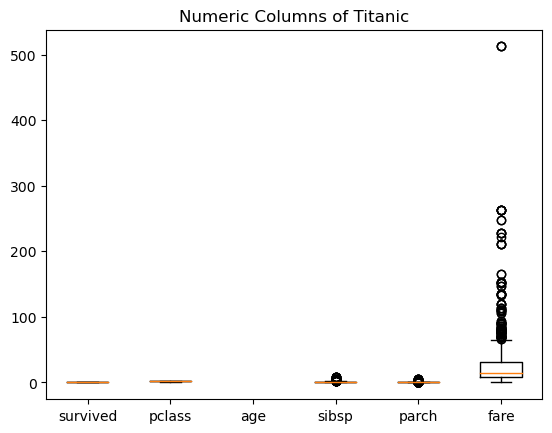

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
plot_columns = ['survived', 'pclass','age', 'sibsp', 'parch', 'fare']

fig, ax = plt.subplots()
ax.boxplot([titanic['survived'], titanic['pclass'], titanic['age'], titanic['sibsp'], titanic['parch'], titanic['fare']])
plt.title('Numeric Columns of Titanic')
plt.xticks([1,2,3,4,5,6], plot_columns)
plt.show()

### 과제 5 : fare 를 0.99 로 상단처리  ( 더 큰 값은 0.99 quantile 값으로 대체)하시오

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec3d101f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec3d1124f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec3d101c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec3d112a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec3d112d60>],
 'means': []}

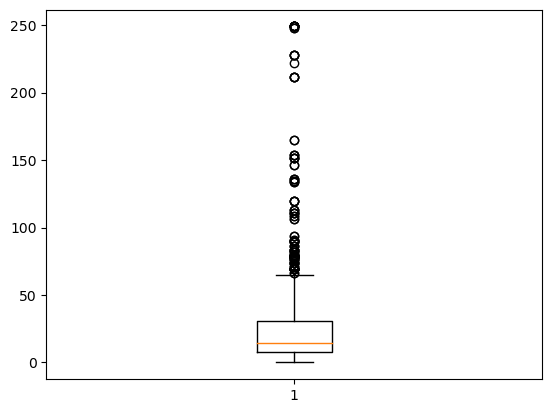

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
val = titanic['fare'].quantile(0.99)
titanic_copy = titanic

location = titanic_copy.loc[titanic_copy['fare']>val]['fare'] #val 보다 큰 fare값을 골라내기
indexes = location.index

for i in indexes:
    titanic_copy.loc[i, 'fare'] = val

plt.boxplot(titanic_copy['fare'])


### 과제 6 :  출발지가  Southampton 과 Cherbourg 만 있다고 가정하고 data cleansing 하시오 

In [12]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
pd.Categorical(titanic['embark_town'], categories=['Southampton', 'Cherbourg']).unique()

['Southampton', 'Cherbourg', NaN]
Categories (2, object): ['Southampton', 'Cherbourg']

### 과제 7 : 여객선 들의 승객의 출발 도시의 차이가 통계적으로 유의한 수준인지 타이타닉 데이터를 통해 판정하시오 

In [14]:
from scipy.stats import chisquare
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
print(chisquare(titanic['embark_town'].value_counts()))

Power_divergenceResult(statistic=625.8110236220473, pvalue=1.2789773792558722e-136)


# 빅데이터 05

## 과제1 : class별 생존자수를 비교하고 (시각화포함), 통계적으로 유의한 차이인지 분석하시오


(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

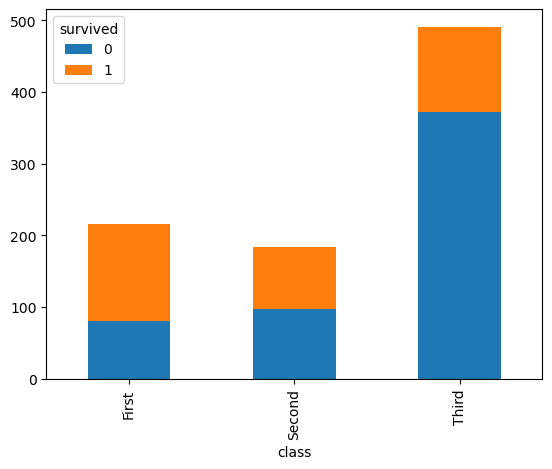

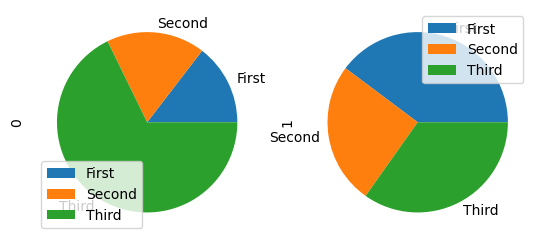

In [7]:
import seaborn as sns
import pandas as pd
from scipy import stats
titanic= sns.load_dataset("titanic")

ct = pd.crosstab(titanic['class'], titanic.survived)
print(stats.chi2_contingency(ct)) #0.05보다 작기 때문에 유의미한 차이가 있다.

ct.plot.bar(stacked=True)
ct.plot.pie(subplots=True)

## 과제2 : 출발도시에 따라 탑승객 연령의 차이가 있는지 분석하시오. 시각화 포함

                df         sum_sq     mean_sq        F    PR(>F)
embark_town    2.0     267.719790  133.859895  0.63664  0.529369
Residual     709.0  149074.349191  210.260013      NaN       NaN


<AxesSubplot:xlabel='embark_town', ylabel='age'>

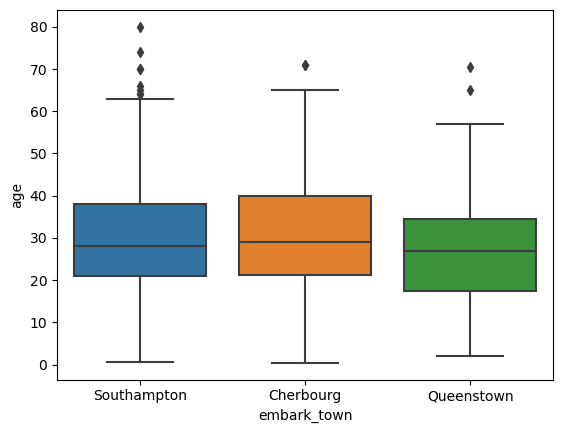

In [2]:
#출발 도시는 3개의 값을 갖는 독립변수이고, nominal-numeric 관계이므로 anova 사용
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

titanic= sns.load_dataset("titanic")

#anova
model = ols('age~embark_town', titanic).fit()
print(anova_lm(model))

#시각화
titanic.groupby('embark_town').age
sns.boxplot(x='embark_town', y='age', data=titanic)

#pr이 0.05보다 크기 때문에 유의미한 차이가 있지 않다.

## 과제3 : red wine 데이터("winequaility-red.csv")에서 quality 변수와 가장 상관관계가 높은 변수를 찾으시오. 시각화, 과정 포함

가장 상관관계가 높은 변수는: alcohol


<AxesSubplot:>

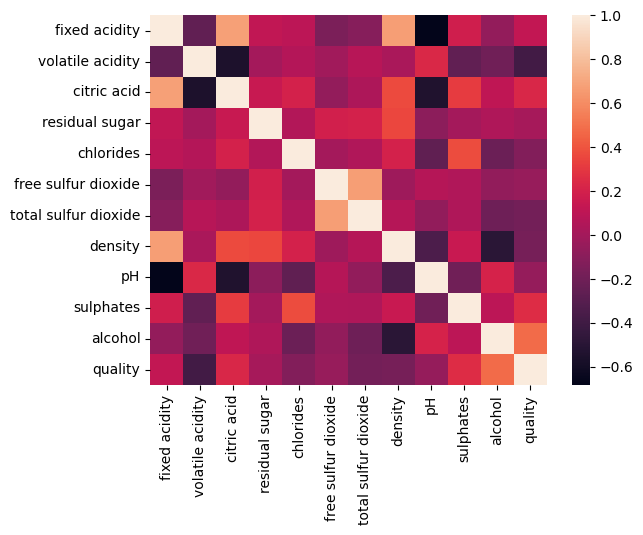

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

red_df = pd.read_csv('./files/winequality-red.csv', sep=';')

q_corr = red_df.corr()['quality'] #numeric-numeric 데이터에서 상관계수구하기
q_corr.drop('quality', axis=0, inplace=True)
q_corr_sort = q_corr.sort_values(ascending=False)
print("가장 상관관계가 높은 변수는:", q_corr_sort.index[0])

sns.heatmap(red_df.corr())


## 과제 4 :  0-4999 번 데이터로 중선형회귀 모델을 만들고 5000~  데이터를 예측하시오

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm

red_df = pd.read_csv('./files/winequality-red.csv', sep=';')
white_df= pd.read_csv("./files/winequality-white.csv", sep=";")
wine=pd.concat([red_df, white_df])
wine.columns = [c.replace(' ', '_') for c in wine.columns]

mymodel =  sm.ols ( 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar', data=wine[:5000]).fit()
mymodel.predict(wine[5000:])

3401    6.020883
3402    5.665520
3403    5.901727
3404    6.137518
3405    6.185155
          ...   
4893    6.084270
4894    5.794605
4895    6.041086
4896    5.984531
4897    6.106236
Length: 1497, dtype: float64

# 빅데이터 06

### 과제1 : 전체 변수로 부터  MedIncome을 예측하는 모델을 만들고, 예측 결과의 상관계수를 계산하시오 

In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\user\AppData\Local\Temp\pip-install-mais8zsg\sklearn_34c1b65c05e3427dba79dd1691e0fc35\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
  UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 2: illegal multibyte sequence
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import scipy.stats as stats

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE']=housing.target

Y= df['MedInc']
X= df.drop(['MedInc'], axis=1, inplace=False)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 2)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

#상관계수 값
print(stats.pearsonr(Y_test, Y_predict))

PearsonRResult(statistic=0.8365616320737397, pvalue=0.0)


### 과제2 : horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 본다. 

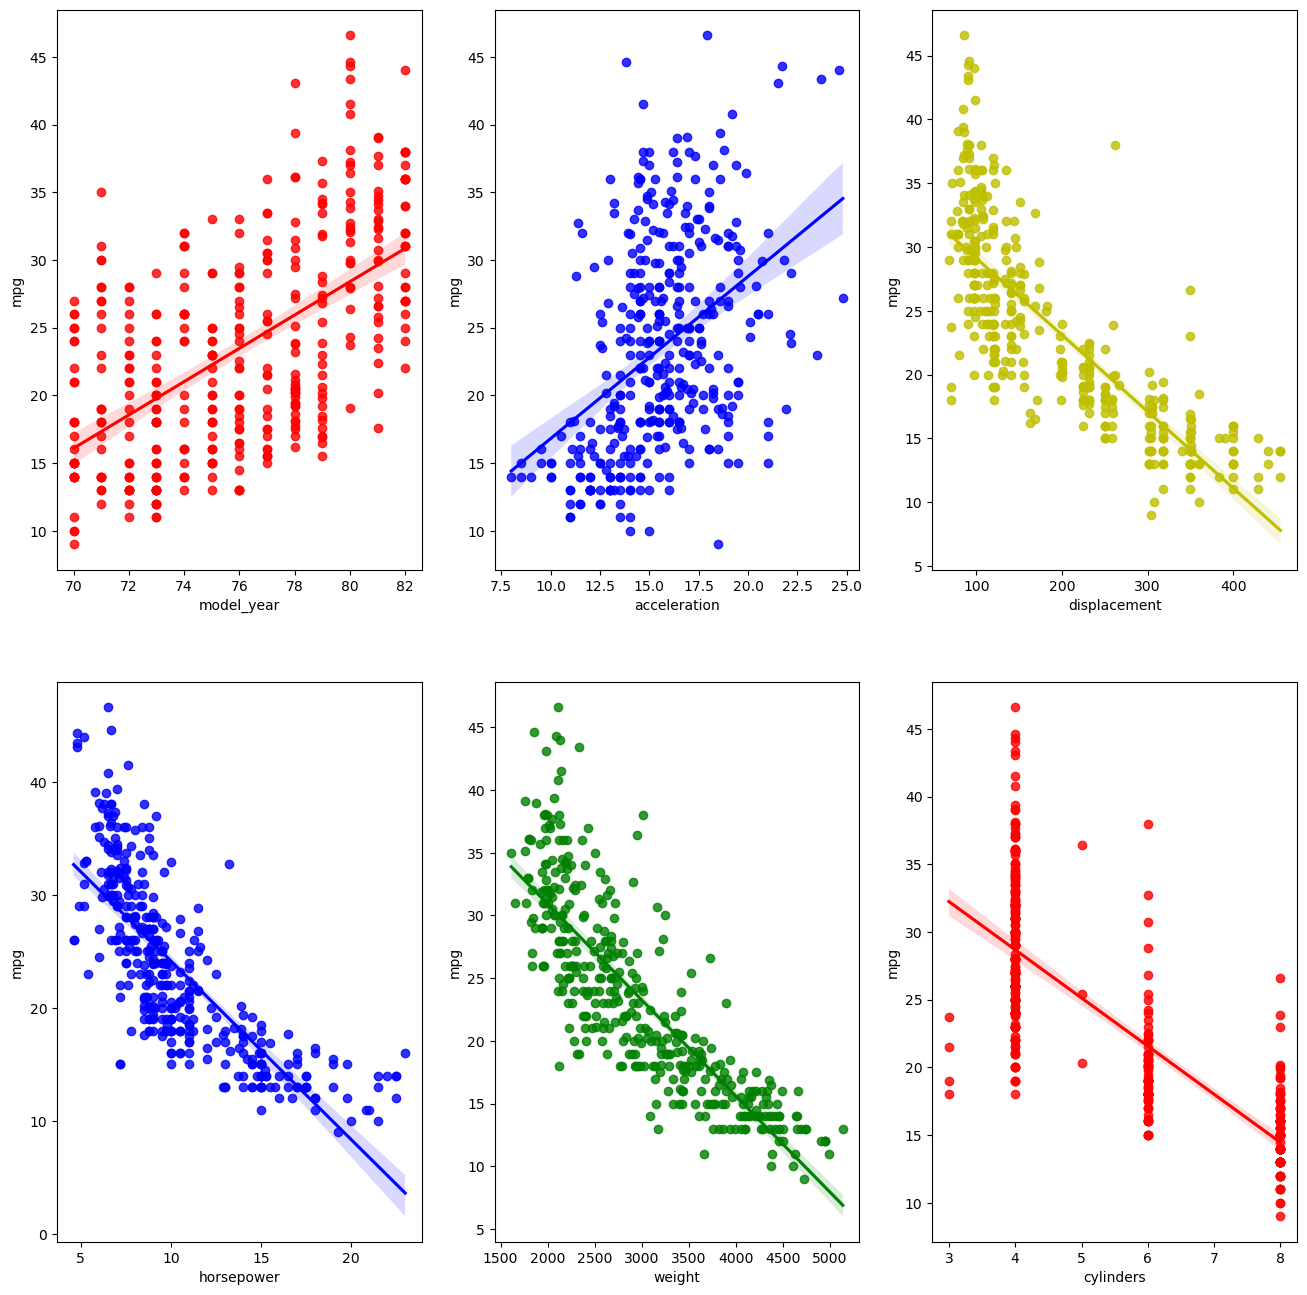

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 불러오고 공백과 결측치 처리하기
data_df = pd.read_csv("./files/auto-mpg.csv", header=0, engine='python')
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)
data_df.horsepower = data_df.horsepower.replace('?',np.NAN)
data_df =data_df.dropna()

#1/10으로 줄이기 
data_df.horsepower = data_df.horsepower.astype('int')
data_df.horsepower = data_df.horsepower * 0.1

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

fig, axs = plt.subplots(figsize=(16,16), ncols = 3, nrows=2) 
x_features = ['model_year', 'acceleration', 'displacement', 'horsepower','weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'b','g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

### 과제3 : housing data 를  5-fold로 cross validation하여 score를 구하시오

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

housing = fetch_california_housing()
Y = housing.target
X = housing.data

m = LinearRegression()
kfold=KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores= cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))
print (scores)

[0.52914023 0.5126393  0.53908745 0.50610094 0.55096393]


# 빅데이터 07

## 과제1 : scale 하지 않은 데이터와 성능 비교하기 

In [46]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

b_cancer = load_breast_cancer()
b_cancer_df= pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target

#스케일링 하지 않은 데이터
Y_raw=b_cancer_df['diagnosis']
X_raw = b_cancer.data
model = LogisticRegression(max_iter=5000)
X_trainraw, X_testraw, Y_train, Y_test = train_test_split(X_raw, Y_raw, test_size=0.3, random_state=0)
model.fit(X_trainraw, Y_train)
Y_predictraw = model.predict(X_testraw)
acccuracy_raw = accuracy_score(Y_test, Y_predictraw)
precision_raw = precision_score(Y_test, Y_predictraw)
recall_raw = recall_score(Y_test, Y_predictraw)
f1_raw = f1_score(Y_test, Y_predictraw)
print('raw 정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy_raw,precision_raw,recall_raw,f1_raw))

#스케일링 한 데이터
b_cancer = load_breast_cancer()
b_cancer_df= pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target
scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)
Y=b_cancer_df['diagnosis']
X=b_cancer_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lr_b_cancer = LogisticRegression()
lr_b_cancer.fit(X_train, Y_train)
Y_predict = lr_b_cancer.predict(X_test)
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))


raw 정확도: 0.959, 정밀도: 0.990, 재현율: 0.944,  F1: 0.967
정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


## 과제 2 : PCA 차원을 3으로 늘리고 성능측정 ->  모델을 svm으로 변경 (3차원) 하여 성능 측정

- from sklearn import svm
- model=svm.SVC()

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

b_cancer = load_breast_cancer()
scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

Y=b_cancer.target
X=b_cancer_scaled

pca = decomposition.PCA(n_components = 3)
pca.fit(X)
X = pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = svm.SVC()
model.fit(X_train, Y_train)

accuracy=accuracy_score(Y_test, Y_predict)
precision=precision_score(Y_test, Y_predict)
recall=recall_score(Y_test, Y_predict)
f1=f1_score(Y_test, Y_predict)
roc_auc=roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))


정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


### 과제3 : 중요 feature 10개만 사용했을 경우와 성능 비교

### 조교님 안녕하세요 코드 블럭이 두 개인데, 위의 블럭은 feature 10개만 사용했을 때이고 아래 블럭은 기존 성능입니다. 

### 감사합니다.

In [ ]:
#중요 feature 10개 사용 성능
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#X, Y 정의
Y=b_cancer.target
Xraw=b_cancer.data

#top 10개 feature 구하기
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', sep='\s+',header=None,  engine='python')
feature_importance_values = dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X_train.columns)
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10]
X_trainraw = X_train.iloc[:,feature_top10.index]

#모델 생성
X_trainraw, X_testraw, Y_train, Y_test=train_test_split(Xraw, Y, test_size=0.3)
model_logist = LogisticRegression(max_iter=5000)
model_logist.fit(X_trainraw, Y_train)
Y_predictraw=model_logist.predict(X_testraw)

accuracy_raw=accuracy_score(Y_test, Y_predictraw)
precision_raw=precision_score(Y_test, Y_predictraw)
recall_raw=recall_score(Y_test, Y_predictraw)
f1_raw=f1_score(Y_test, Y_predictraw)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision_raw,recall_raw,f1_raw))

In [ ]:
#기존 성능 (과제 1번 위에 있는 코드의 실행결과(성능)와 동일함 )
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data) #차원 조절, data에 맞춰서
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lr_b_cancer = LogisticRegression()
lr_b_cancer.fit(X_train, Y_train)
Y_predict = lr_b_cancer.predict(X_test)

acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율:{2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))